# Import Library

In [2]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train.shape,test.shape

((300000, 32), (200000, 31))

In [5]:
data = pd.concat([train,test])

In [ ]:
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0.0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0.0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0.0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0.0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1.0


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 199999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      500000 non-null  int64  
 1   cat0    500000 non-null  object 
 2   cat1    500000 non-null  object 
 3   cat2    500000 non-null  object 
 4   cat3    500000 non-null  object 
 5   cat4    500000 non-null  object 
 6   cat5    500000 non-null  object 
 7   cat6    500000 non-null  object 
 8   cat7    500000 non-null  object 
 9   cat8    500000 non-null  object 
 10  cat9    500000 non-null  object 
 11  cat10   500000 non-null  object 
 12  cat11   500000 non-null  object 
 13  cat12   500000 non-null  object 
 14  cat13   500000 non-null  object 
 15  cat14   500000 non-null  object 
 16  cat15   500000 non-null  object 
 17  cat16   500000 non-null  object 
 18  cat17   500000 non-null  object 
 19  cat18   500000 non-null  object 
 20  cont0   500000 non-null  float64
 21  cont1   50

In [ ]:
data.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,300000.000000
mean,249999.500000,0.505004,0.494028,0.516549,0.474655,0.504817,0.501827,0.487863,0.502117,0.488177,0.469623,0.508528,0.264870
std,144337.711634,0.207040,0.212900,0.214811,0.216750,0.227364,0.241296,0.211335,0.203615,0.178987,0.194709,0.203606,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,-0.005648,0.090901,0.013554,0.214866,0.097789,0.000000
25%,124999.750000,0.344881,0.317528,0.326111,0.292455,0.279346,0.276002,0.323335,0.353192,0.359006,0.309916,0.368589,0.000000
50%,249999.500000,0.479646,0.463183,0.471095,0.389550,0.480037,0.554752,0.517779,0.435724,0.411067,0.407304,0.446577,0.000000
75%,374999.250000,0.638083,0.693951,0.704678,0.645278,0.725551,0.735190,0.608117,0.643630,0.612634,0.587243,0.582422,1.000000
max,499999.000000,1.006825,1.011597,1.016600,0.965609,0.867198,0.853022,0.966553,1.035818,1.055885,1.007189,1.011331,1.000000


In [ ]:
data.describe(include = ['O'])

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
count,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000
unique,2,15,19,13,20,84,16,51,61,19,307,2,2,2,2,4,4,4,4
top,A,I,A,A,E,BI,A,AH,BM,A,DJ,A,A,A,A,B,D,D,B
freq,372548,150961,281159,311757,215458,397479,312994,76411,70748,336168,52750,431518,428237,487728,266773,339116,344814,412191,425550


In [6]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
num_features = [feature for feature in data.columns if feature not in cat_features + ['id']]

In [ ]:
cat_features

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18']

In [ ]:
num_features

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'target']

## Explore the numerical features

In [ ]:
data[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
cont0,500000.0,0.505004,0.207040,-0.049562,0.344881,0.479646,0.638083,1.006825
cont1,500000.0,0.494028,0.212900,0.084480,0.317528,0.463183,0.693951,1.011597
cont2,500000.0,0.516549,0.214811,0.094493,0.326111,0.471095,0.704678,1.016600
cont3,500000.0,0.474655,0.216750,-0.045316,0.292455,0.389550,0.645278,0.965609
cont4,500000.0,0.504817,0.227364,0.168071,0.279346,0.480037,0.725551,0.867198
cont5,500000.0,0.501827,0.241296,-0.036379,0.276002,0.554752,0.735190,0.853022
cont6,500000.0,0.487863,0.211335,-0.005648,0.323335,0.517779,0.608117,0.966553
cont7,500000.0,0.502117,0.203615,0.090901,0.353192,0.435724,0.643630,1.035818
cont8,500000.0,0.488177,0.178987,0.013554,0.359006,0.411067,0.612634,1.055885
cont9,500000.0,0.469623,0.194709,0.214866,0.309916,0.407304,0.587243,1.007189


create the confusion matrix to detect the relationship between covariates

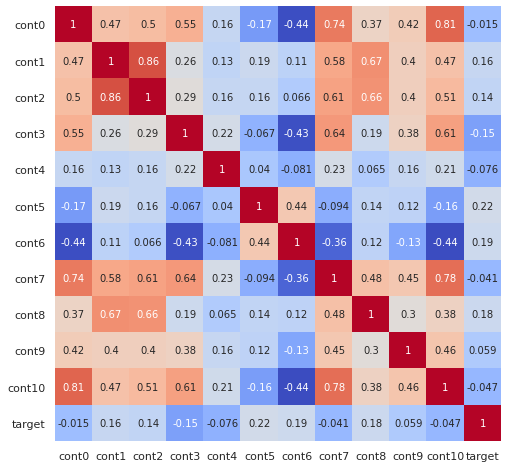

In [ ]:
corr_matrix = data[num_features].corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True,ax = ax,cbar=False, cmap = 'coolwarm')


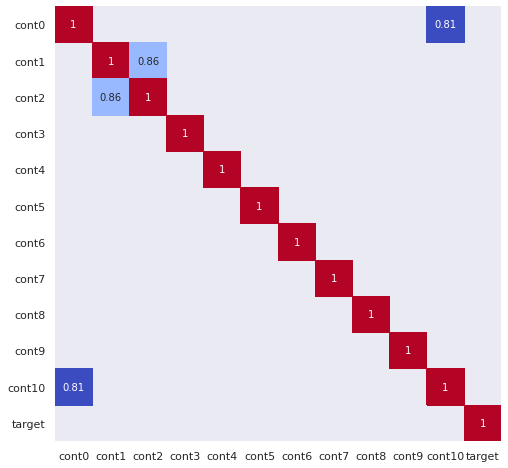

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True,ax = ax,cbar=False, cmap = 'coolwarm',mask = corr_matrix <0.8)

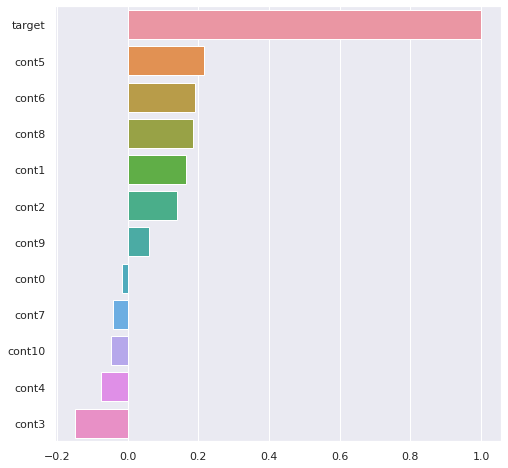

In [ ]:
target_corr = data[num_features].corr()['target'].sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x = target_corr.values,y = target_corr.index)

## Explore the categorical features

detect the number of subcategories of each categorical feature

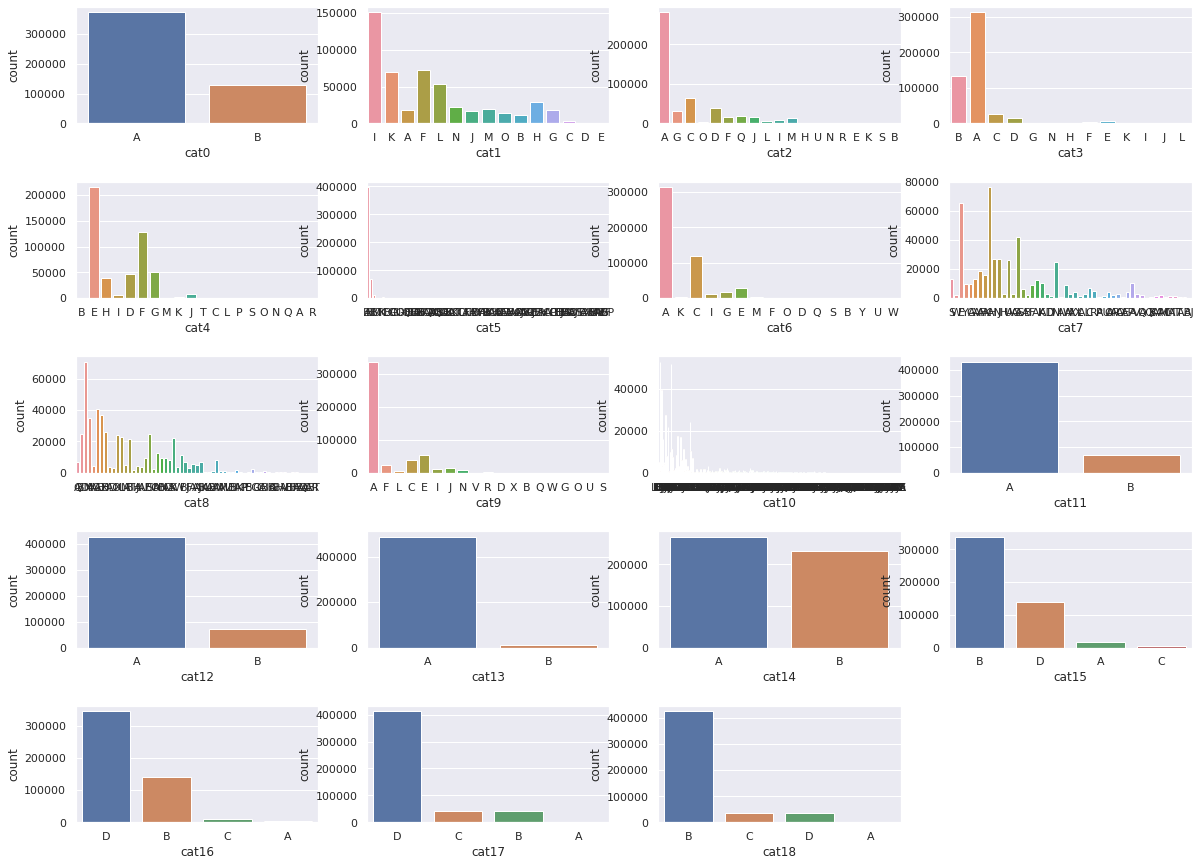

In [ ]:
fig = plt.figure(figsize = (20,15))
gs = fig.add_gridspec(5,4)
gs.update(wspace=0.2, hspace=0.5)

run_no = 0
for row in range(0, 5):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        run_no +=1
        
run_no = 0
for col in cat_features:
    sns.countplot(data = data,x=col, ax=locals()["ax"+str(run_no)])
    run_no += 1
    

ax19.remove()

cat5

In [ ]:
cat5_keep = list(data['cat5'].value_counts().sort_values(ascending=False)[:5].index)

In [ ]:
data['cat5'] = data['cat5'].apply(lambda x: x if x in cat5_keep else 'others')

In [ ]:
data['cat5'].value_counts()

BI        397479
AB         69607
others     16036
BU         11315
K           4447
G           1116
Name: cat5, dtype: int64

cat7

In [ ]:
data['cat7'].value_counts().sort_values(ascending=False)/data.shape[0]

AH    0.152822
E     0.131682
AS    0.084628
J     0.053866
AN    0.053596
U     0.052636
N     0.050012
AF    0.038012
AK    0.032346
AV    0.026472
S     0.026464
AI    0.025186
A     0.021364
K     0.021042
Y     0.019740
G     0.018826
F     0.018468
AW    0.017764
C     0.014474
AA    0.012552
R     0.009870
AX    0.008930
O     0.008310
AP    0.007916
AD    0.006114
V     0.005972
AY    0.005890
AO    0.005700
H     0.005640
AG    0.005594
AL    0.005214
W     0.004964
B     0.004550
Q     0.004404
AM    0.003868
AR    0.003620
L     0.003276
AT    0.003034
M     0.002968
D     0.002812
BA    0.002612
AU    0.002240
AC    0.002190
I     0.002184
X     0.002132
P     0.002034
AB    0.001840
AE    0.001552
T     0.001196
AJ    0.000768
AQ    0.000654
Name: cat7, dtype: float64

In [ ]:
cat7_keep = list(data['cat7'].value_counts().sort_values(ascending=False)[:7].index)

In [ ]:
data['cat7'] = data['cat7'].apply(lambda x: x if x in cat7_keep else 'others')

In [ ]:
data['cat7'].value_counts()

others    210379
AH         76411
E          65841
AS         42314
J          26933
AN         26798
U          26318
N          25006
Name: cat7, dtype: int64

cat8

In [ ]:
data['cat8'].value_counts().sort_values(ascending=False)/data.shape[0]

BM    0.141496
AE    0.081036
AX    0.073564
Y     0.069666
H     0.051944
S     0.049902
AD    0.049238
X     0.047892
L     0.045532
K     0.043856
AT    0.043788
N     0.025938
I     0.022992
AF    0.019436
BC    0.019132
AN    0.018902
AS    0.016716
BN    0.016504
BJ    0.014224
Q     0.013858
AK    0.013400
A     0.010862
M     0.010458
AJ    0.010292
J     0.008666
AG    0.008362
AU    0.007944
BD    0.007250
AW    0.007208
AO    0.006084
F     0.005596
BO    0.005334
BG    0.004280
BH    0.003668
BK    0.003298
AM    0.002750
AY    0.002324
AI    0.002060
AV    0.001882
BI    0.001698
BL    0.001368
BE    0.000918
E     0.000744
AH    0.000714
V     0.000700
BB    0.000688
BA    0.000638
AP    0.000628
BF    0.000604
AL    0.000576
U     0.000540
O     0.000480
C     0.000442
AB    0.000388
G     0.000362
T     0.000242
P     0.000226
AQ    0.000224
AC    0.000202
B     0.000172
AR    0.000112
Name: cat8, dtype: float64

In [ ]:
cat8_keep = list(data['cat8'].value_counts().sort_values(ascending=False)[:11].index)

In [ ]:
data['cat8'] = data['cat8'].apply(lambda x: x if x in cat8_keep else 'others')

In [ ]:
data['cat8'].value_counts()

others    151043
BM         70748
AE         40518
AX         36782
Y          34833
H          25972
S          24951
AD         24619
X          23946
L          22766
K          21928
AT         21894
Name: cat8, dtype: int64

cat 10

In [ ]:
data['cat10'].value_counts().sort_values(ascending=False)/data.shape[0]

DJ    0.105500
HK    0.103114
DP    0.078822
GS    0.055222
CR    0.047882
HX    0.043714
CK    0.035370
DC    0.034436
HQ    0.031922
MD    0.022592
LN    0.022580
LF    0.020970
IE    0.020774
LM    0.019648
KW    0.017316
HG    0.015674
IG    0.014928
HB    0.014128
DF    0.012784
LB    0.012612
HV    0.011414
LO    0.010486
HC    0.010092
HJ    0.009494
EK    0.008242
LY    0.006616
GC    0.006548
GE    0.006522
GK    0.006490
CS    0.005742
MJ    0.005040
HH    0.004460
MC    0.004196
CD    0.004196
HA    0.003934
GQ    0.003546
LI    0.003388
GI    0.003352
KB    0.003330
CB    0.002952
JW    0.002914
JR    0.002732
FR    0.002730
R     0.002706
JG    0.002684
AV    0.002528
CU    0.002316
FS    0.002280
GU    0.002264
BY    0.002254
HN    0.002252
FN    0.002236
HL    0.002230
MG    0.002218
JD    0.002150
IJ    0.002120
JK    0.002042
MB    0.001932
KV    0.001876
LV    0.001824
BF    0.001818
EQ    0.001758
IX    0.001654
EV    0.001650
BV    0.001634
IK    0.001626
AD    0.00

In [ ]:
cat10_keep = list(data['cat10'].value_counts().sort_values(ascending=False)[:9].index)

In [ ]:
data['cat10'] = data['cat10'].apply(lambda x: x if x in cat10_keep else 'others')

In [ ]:
data['cat10'].value_counts()

others    232009
DJ         52750
HK         51557
DP         39411
GS         27611
CR         23941
HX         21857
CK         17685
DC         17218
HQ         15961
Name: cat10, dtype: int64

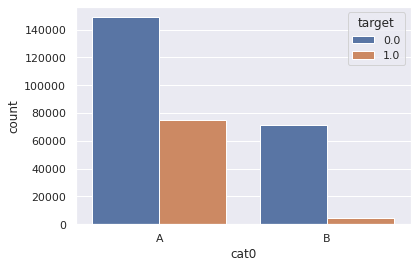

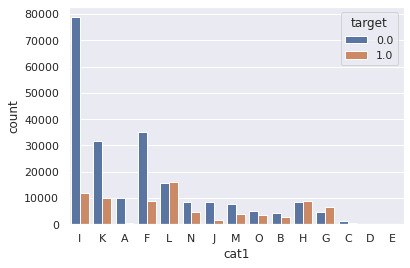

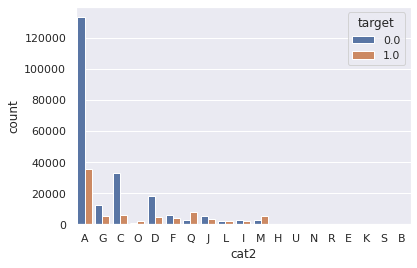

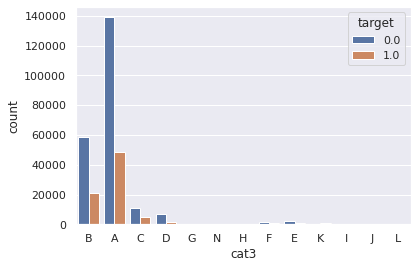

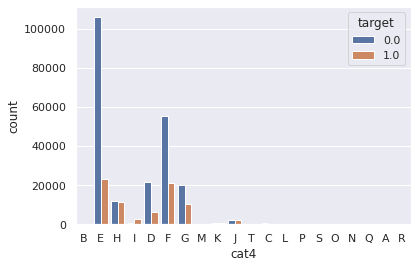

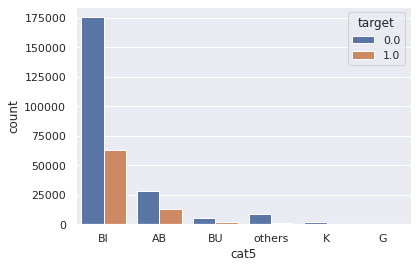

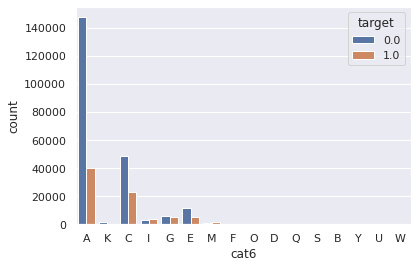

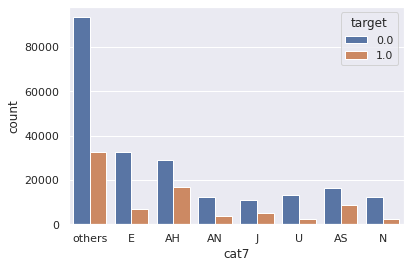

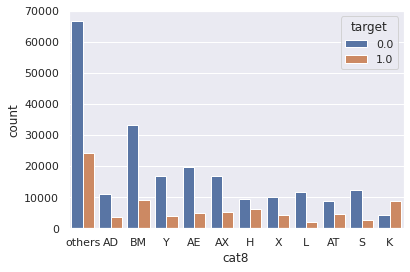

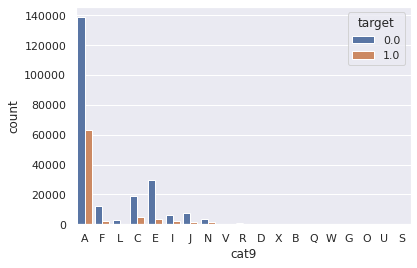

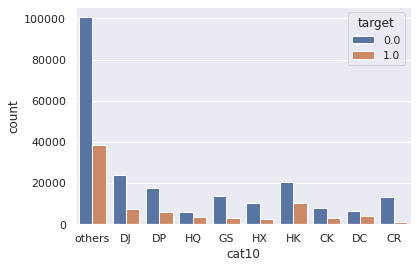

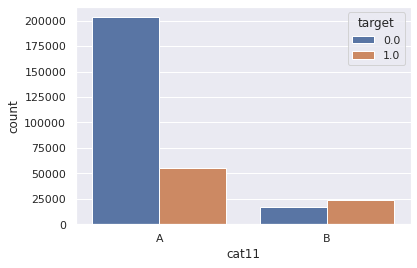

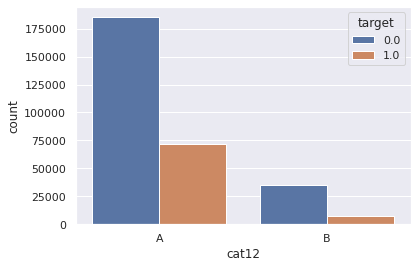

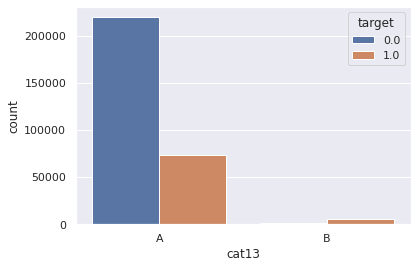

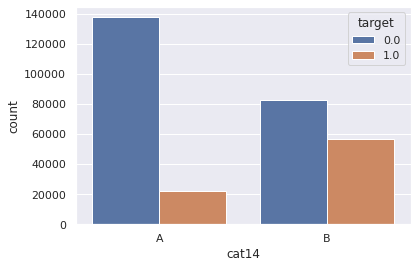

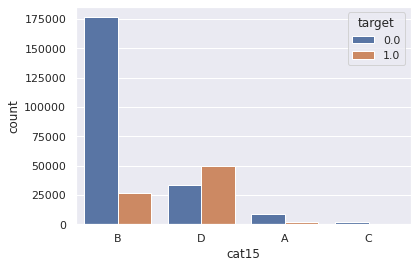

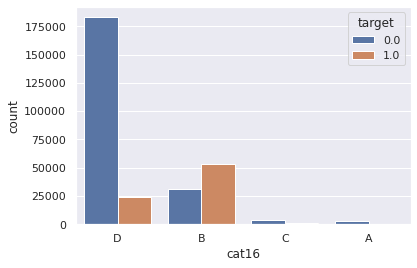

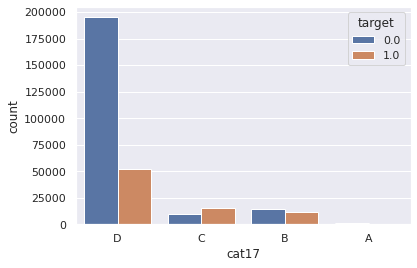

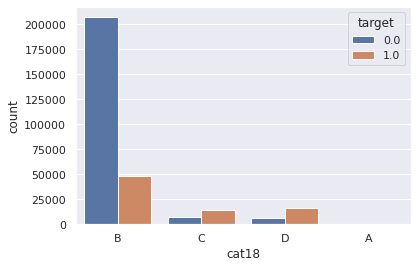

In [ ]:
for col in cat_features:
    sns.countplot(data=data, x = col,hue = 'target')
    plt.show()

In [ ]:
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,others,others,A,others,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0.0
1,1,A,I,A,A,E,BI,K,others,AD,F,others,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0.0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0.0
3,3,A,K,A,C,E,BI,A,others,AD,F,others,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0.0
4,4,A,I,G,B,E,BI,C,others,others,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1.0


In [7]:
data_label = data.copy()

# Encode the categorical dataset 

The reason of using label encoding : 


*   avoid the curse of dimensionality
*   evaluate the importance of each features



In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_features:
    data_label[col] = le.fit_transform(data_label[col])

In [ ]:
data_label

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0,8,0,1,1,1,0,7,11,0,9,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0.0
1,1,0,8,0,0,4,1,8,7,0,5,9,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0.0
2,2,0,10,0,0,4,1,0,3,4,9,3,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0.0
3,3,0,10,0,2,4,1,0,7,0,5,9,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0.0
4,4,0,8,6,1,4,1,2,7,11,0,4,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499983,0,13,0,3,5,1,0,7,3,0,4,0,0,0,1,3,1,2,1,0.451496,0.361426,0.351946,0.327670,0.205547,0.679195,0.485967,0.319130,0.520681,0.519545,0.427119,NaN
199996,499984,1,8,0,1,4,1,0,2,8,4,9,0,0,0,1,1,3,3,1,0.862988,0.551106,0.628843,0.677765,0.624935,0.555306,0.242424,0.700829,0.531728,0.528427,0.922645,NaN
199997,499987,0,11,3,0,7,1,0,1,11,0,9,0,0,0,1,3,1,3,1,0.463067,0.812384,0.803348,0.324762,0.665624,0.488447,0.853213,0.578641,0.811941,0.537106,0.531758,NaN
199998,499994,0,10,0,2,5,1,0,7,4,0,6,0,0,0,0,1,3,3,1,0.519671,0.811282,0.820635,0.561449,0.797434,0.555089,0.746532,0.369986,0.438712,0.715524,0.381978,NaN


In [9]:
data_label.drop(["id"],axis=1,inplace=True)
data_label = data_label.reset_index(drop=True)

Split the train and test dataset

In [11]:
test = data_label[data_label['target'].isnull()].reset_index(drop = True).copy()
y_test = test['target']
x_test = test.drop(['target'],axis =1)
X = data_label[data_label['target'].notnull()].reset_index(drop = True).copy()
y_train = X['target']
x_train = X.drop(['target'],axis = 1)

In [12]:
x_train.shape

(300000, 30)

# Part I Assess three imputation methods

## DecisionTreeClassifier

Using DecisionTreeClassifier to determine the importance of 30 features

Feature: 0, Score 0.01131
Feature: 1, Score 0.01836
Feature: 2, Score 0.01563
Feature: 3, Score 0.00753
Feature: 4, Score 0.01241
Feature: 5, Score 0.00429
Feature: 6, Score 0.01037
Feature: 7, Score 0.01084
Feature: 8, Score 0.01348
Feature: 9, Score 0.00833
Feature: 10, Score 0.00876
Feature: 11, Score 0.01015
Feature: 12, Score 0.00280
Feature: 13, Score 0.00179
Feature: 14, Score 0.01002
Feature: 15, Score 0.02410
Feature: 16, Score 0.26762
Feature: 17, Score 0.00641
Feature: 18, Score 0.03152
Feature: 19, Score 0.04113
Feature: 20, Score 0.04738
Feature: 21, Score 0.04594
Feature: 22, Score 0.04501
Feature: 23, Score 0.04839
Feature: 24, Score 0.06780
Feature: 25, Score 0.05243
Feature: 26, Score 0.04182
Feature: 27, Score 0.04677
Feature: 28, Score 0.04508
Feature: 29, Score 0.04253


<function matplotlib.pyplot.show>

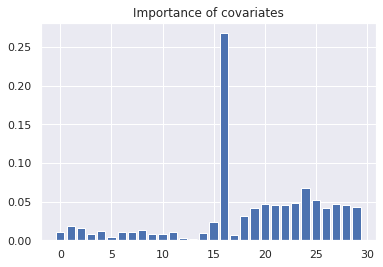

In [ ]:
# decision tree for feature importance on a classification problem 

# define the model 
model = DecisionTreeClassifier()
# fit the model 
model.fit(x_train,y_train)
# get importance 
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))],importance)
plt.title("Importance of covariates")
plt.show

### Some important variables

Randomly select some important features for the next analysis

In [ ]:
data_important = x_train[["cont5","cont8","cat13",'cat16','cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
data_important

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0,3,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0,1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0,3,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0,3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.128291,0.351103,0,1,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0,1,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0,3,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.810663,0.373997,0,1,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.680430,0,0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


## Data processing 



1.   Randomly select two columns of continuous variable data
2.   Extract row and column features to prepare for subsequent conversion of null values

1.   Randomly select 5% of data in two selected columns
2.   Get the row and column coordinates of the data that was randomly converted to 5% in the step 3

1.   Convert the 5 percent of the data into a null value
2.   Do the same for categorical variables











### Continuous variable








In [ ]:
# Extract cont5 and cont8 to prepare for conversion to NA
premiss_con = x_train[["cont5","cont8"]]
premiss_con

,cont5,cont8
0,0.621672,0.815254
1,0.357778,0.399353
2,0.552877,0.412303
3,0.619147,0.633669
4,0.128291,0.351103
...,...,...
299995,0.145840,0.519340
299996,0.735879,0.470575
299997,0.810663,0.373997
299998,0.735147,0.680430


In [ ]:
# Extract row and column features
n_samples = premiss_con.shape[0]
print(n_samples)
n_features = premiss_con.shape[1]
print(n_features)

300000
2


In [ ]:
# Randomly select 5% of data in two selected columns
rng = np.random.RandomState(0)
missing_rate = 0.05
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
# np.floor rounds down and returns a floating point number in .0 format
n_missing_samples 

30000

In [ ]:
# Get the row and column coordinates of the data that was randomly converted to 5% in the step 3
missing_features = rng.randint(0,n_features,n_missing_samples) #column
print(missing_features)
missing_samples = rng.randint(0,n_samples,n_missing_samples) #row
print(missing_samples)

[0 1 1 ... 0 0 1]
[126535 131401 128113 ...  30738  56936 287071]


In [ ]:
# Fill in empty values
premiss_con2 = premiss_con.copy()
for i in range(0,n_missing_samples):
    premiss_con2.iloc[missing_samples[i],missing_features[i]]= np.NaN

In [ ]:
# Continuous data set containing null values
premiss_con2

,cont5,cont8
0,0.621672,0.815254
1,0.357778,0.399353
2,0.552877,0.412303
3,0.619147,0.633669
4,NaN,0.351103
...,...,...
299995,0.145840,0.519340
299996,0.735879,0.470575
299997,NaN,0.373997
299998,0.735147,NaN


In [ ]:
# Check data
premiss_con2.isnull().sum()
print(premiss_con2.isnull().sum())

cont5    14640
cont8    14668
dtype: int64




###  Categorical variables




In [ ]:
 # Extract cat13 and cat16 to prepare for conversion to NA
premiss_cat = x_train[["cat13","cat16"]]
premiss_cat

,cat13,cat16
0,0,3
1,0,1
2,0,3
3,0,3
4,0,1
...,...,...
299995,0,1
299996,0,3
299997,0,1
299998,0,0


In [ ]:
# Extract row and column features
n_samples_cat = premiss_cat.shape[0]
print(n_samples_cat)
n_features_cat = premiss_cat.shape[1]
print(n_features_cat)

300000
2


In [ ]:
# Randomly select 5% of data in two selected columns
rng = np.random.RandomState(123)
missing_rate = 0.05
n_missing_samples_cat = int(np.floor(n_samples_cat * n_features_cat * missing_rate))
# np.floor rounds down and returns a floating point number in .0 format
n_missing_samples_cat

30000

In [ ]:
# Get the row and column coordinates of the data that was randomly converted to 5% in the step 3
missing_features_cat = rng.randint(0,n_features_cat,n_missing_samples_cat) # column
print(missing_features_cat)
missing_samples_cat = rng.randint(0,n_samples_cat,n_missing_samples_cat)
print(missing_samples_cat)

[0 1 0 ... 1 1 1]
[280479  25075  36930 ...  14505 243615 232696]


In [ ]:
# Fill in empty values
premiss_cat2 = premiss_cat.copy()
for i in range(0,n_missing_samples_cat):
    premiss_cat2.iloc[missing_samples_cat[i],missing_features_cat[i]]= np.NaN

In [ ]:
# Categorical variables with null values
premiss_cat2

,cat13,cat16
0,0.0,3.0
1,0.0,1.0
2,0.0,3.0
3,0.0,3.0
4,0.0,1.0
...,...,...
299995,NaN,1.0
299996,0.0,3.0
299997,0.0,1.0
299998,0.0,0.0


In [ ]:
# Check data
premiss_cat2.isnull().sum()
print(premiss_cat2.isnull().sum())

cat13    14661
cat16    14592
dtype: int64


## Final data set





1.   Combine variables with null values(cont5,cont8,cat13 and cat16)
2.   Select the data set that does not contain missing values

1.   Combine the two data sets with and without missing values, and get the final data set









In [ ]:
# data with missing value
miss_dat = premiss_con2.join(premiss_cat2)
miss_dat

,cont5,cont8,cat13,cat16
0,0.621672,0.815254,0.0,3.0
1,0.357778,0.399353,0.0,1.0
2,0.552877,0.412303,0.0,3.0
3,0.619147,0.633669,0.0,3.0
4,NaN,0.351103,0.0,1.0
...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0
299996,0.735879,0.470575,0.0,3.0
299997,NaN,0.373997,0.0,1.0
299998,0.735147,NaN,0.0,0.0


In [ ]:
# data without missing value
data_important = data_important.copy()
no_missing = data_important .iloc[:,4:13]
no_missing 

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...
299995,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# final data set
final = miss_dat.join(no_missing)
final

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,NaN,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,NaN,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,NaN,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


## Construct training data set and test data set



1.   Training data set Y for cont5:
All non-empty values in cont5
2.   Training data set X for cont5:
When cont5 is non-empty value, all rows of other features that do not contain any null values 

1.   Test data set X for cont5:
When cont5 is empty value, all rows of other features that do not contain any null values 

1.   Predictive value:The predicted value for null value
2.   Cont8, cat13 and cat16 obtain the training data set and the test data set in the same way










### cont5

In [ ]:
# training data set Y for cont5
final2 = final.copy()
train_con5y = final2[final2['cont5'].notnull()]['cont5']
train_con5y

0         0.621672
1         0.357778
2         0.552877
3         0.619147
5         0.261055
            ...   
299994    0.272891
299995    0.145840
299996    0.735879
299998    0.735147
299999    0.355467
Name: cont5, Length: 285360, dtype: float64

In [ ]:
# training data set X for cont5
train_con5x = final2[final2['cont5'].notnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
train_con5x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
5,0,0.193988,0,1,0.413038,0.524760,1,0.580085,0
...,...,...,...,...,...,...,...,...,...
299994,1,0.946279,1,1,0.392357,0.458536,1,0.254906,0
299995,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299998,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# test data set X for cont5  
test_con5x = final2[final2['cont5'].isnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
test_con5x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
4,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
27,0,0.662209,1,1,0.686580,0.710979,1,0.635591,1
114,1,0.557363,0,1,0.371805,0.389935,3,0.073160,0
140,1,0.541665,0,1,0.317349,0.305924,0,0.591897,0
171,1,0.333283,1,3,0.225502,0.255360,3,0.250833,0
...,...,...,...,...,...,...,...,...,...
299915,0,0.831935,0,2,0.926052,0.774040,3,0.281758,0
299921,0,0.252576,1,1,0.350569,0.382687,1,0.316298,1
299947,1,0.526836,0,1,0.330810,0.339575,3,0.334805,0
299978,1,0.483159,0,1,0.758152,0.553847,1,0.829591,0


### Cont8

In [ ]:
# training data set Y for cont8
train_con8y = final2[final2['cont8'].notnull()]['cont8']
train_con8y

0         0.815254
1         0.399353
2         0.412303
3         0.633669
4         0.351103
            ...   
299994    0.335183
299995    0.519340
299996    0.470575
299997    0.373997
299999    0.823655
Name: cont8, Length: 285332, dtype: float64

In [ ]:
# training data set X for cont8
train_con8x = final2[final2['cont8'].notnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
train_con8x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...
299994,1,0.946279,1,1,0.392357,0.458536,1,0.254906,0
299995,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0


In [ ]:
# test data set X for cont8
test_con8x = final2[final2['cont8'].isnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
test_con8x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
92,0,0.224438,0,1,0.487182,0.396162,3,0.260583,0
107,0,0.095462,0,1,0.467575,0.458414,1,0.696290,0
146,0,0.162962,0,1,0.544093,0.932784,1,0.840210,0
254,1,0.579910,0,1,0.568413,0.771342,1,0.778997,0
289,0,0.665863,0,1,0.629441,0.612097,1,0.583336,1
...,...,...,...,...,...,...,...,...,...
299929,1,0.265555,1,1,0.725761,0.817400,1,0.880419,0
299940,0,0.833420,0,1,0.765482,0.856159,1,0.258242,1
299964,0,0.616834,0,1,0.348490,0.294813,1,0.648524,0
299967,1,0.494409,0,1,0.460536,0.422120,1,0.313338,0


### Cat13

In [ ]:
# Training data set Y for cat13
train_cat13y = final2[final2['cat13'].notnull()]['cat13']
train_cat13y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
299994    0.0
299996    0.0
299997    0.0
299998    0.0
299999    0.0
Name: cat13, Length: 285339, dtype: float64

In [ ]:
# training data set X for cat13
train_cat13x = final2[final2['cat13'].notnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
train_cat13x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...
299994,1,0.946279,1,1,0.392357,0.458536,1,0.254906,0
299996,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# test data set X for cat13
test_cat13x = final2[final2['cat13'].isnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
test_cat13x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
31,0,0.267417,1,1,0.813166,0.865505,1,0.227193,1
38,1,0.407421,1,1,0.442879,0.494620,1,0.214439,0
41,1,0.383097,0,1,0.345206,0.348713,1,0.585527,0
44,0,0.755276,0,1,0.698719,0.686278,1,0.681514,0
95,1,0.134955,0,1,0.314190,0.354021,1,0.578749,1
...,...,...,...,...,...,...,...,...,...
299894,0,0.575625,0,1,0.250566,0.233288,1,0.601673,1
299907,1,0.934852,1,3,0.446146,0.490710,3,0.345959,0
299917,0,0.525460,0,1,0.315577,0.341576,1,0.616212,0
299990,1,0.721238,0,1,0.210515,0.238612,3,0.269438,0


### Cat16

In [ ]:
# training data set Y for cat16
train_cat16y = final2[final2['cat16'].notnull()]['cat16']
train_cat16y

0         3.0
1         1.0
2         3.0
3         3.0
4         1.0
         ... 
299995    1.0
299996    3.0
299997    1.0
299998    0.0
299999    3.0
Name: cat16, Length: 285408, dtype: float64

In [ ]:
# training data set X for cat16
train_cat16x = final2[final2['cat16'].notnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
train_cat16x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...
299995,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# test data set X for cat16
test_cat16x = final2[final2['cat16'].isnull()].loc[:,['cat14','cont6','cat11','cat18','cont1','cont2','cat15','cont3','cat0']]
test_cat16x

,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
36,0,0.763031,0,1,0.548127,0.705013,1,0.543092,0
38,1,0.407421,1,1,0.442879,0.494620,1,0.214439,0
41,1,0.383097,0,1,0.345206,0.348713,1,0.585527,0
60,1,0.832801,0,1,0.815263,0.754507,3,0.303274,0
70,1,0.158398,0,1,0.505173,0.644595,3,0.569174,0
...,...,...,...,...,...,...,...,...,...
299836,1,0.203812,0,1,0.432453,0.508100,1,0.651903,1
299842,1,0.566529,0,1,0.328062,0.283981,0,0.587128,0
299888,0,0.114951,0,1,0.469192,0.513825,1,0.553147,1
299935,0,0.562807,0,1,0.438942,0.946381,1,0.302838,0


## KNN imputation

In [ ]:
# Using KNN regression and KNN Classifier to impute data

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

def knn_missing_filled(train_x,train_y,test,dispersed = True):
    if dispersed:
        clf = KNeighborsClassifier()
    else: clf = KNeighborsRegressor()
    clf.fit(train_x,train_y)
    return test.index,clf.predict(test)

### Imputation for cont5

In [ ]:
# Impute missing values for cont5
index,pred = knn_missing_filled(train_con5x,train_con5y,test_con5x,dispersed = False)
index,pred

(Int64Index([     4,     27,    114,    140,    171,    186,    231,    253,    257,    260,
             ...
             299835, 299866, 299877, 299880, 299881, 299915, 299921, 299947, 299978, 299997], dtype='int64', length=14640),
 array([0.59430908, 0.63277609, 0.52857738, ..., 0.64935939, 0.4846318 ,
        0.58653124]))

In [ ]:
# Return cont5 to the original data set
final2.loc[index,'cont5']= pred
final2

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.594309,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.586531,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,NaN,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cont8

In [ ]:
# Impute missing values for cont8
index2,pred2 = knn_missing_filled(train_con8x,train_con8y,test_con8x,dispersed = False)
index2,pred2 

(Int64Index([    92,    107,    146,    254,    289,    293,    294,    317,    324,    325,
             ...
             299811, 299823, 299826, 299843, 299851, 299929, 299940, 299964, 299967, 299998], dtype='int64', length=14668),
 array([0.46281301, 0.53713029, 0.47736717, ..., 0.35586437, 0.34937113,
        0.43538192]))

In [ ]:
# Return cont8 to the original data set
final2.loc[index2,'cont8']= pred2
final2

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.594309,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.586531,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.435382,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cat13

In [ ]:
# Impute missing values for cat13
index3,pred3 = knn_missing_filled(train_cat13x,train_cat13y,test_cat13x,dispersed =True)
index3,pred3 

(Int64Index([    31,     38,     41,     44,     95,    111,    114,    124,    128,    136,
             ...
             299789, 299857, 299858, 299861, 299881, 299894, 299907, 299917, 299990, 299995], dtype='int64', length=14661),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
# Return cat13 to the original data set
final2.loc[index3,'cat13']= pred3
final2

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.594309,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0.0,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.586531,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.435382,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cat16

In [ ]:
# Impute missing values for cat16
index4,pred4 = knn_missing_filled(train_cat16x,train_cat16y,test_cat16x,dispersed =True)
index4,pred4 

(Int64Index([    36,     38,     41,     60,     70,    134,    152,    203,    204,    224,
             ...
             299650, 299714, 299769, 299802, 299830, 299836, 299842, 299888, 299935, 299994], dtype='int64', length=14592),
 array([3., 1., 3., ..., 3., 2., 3.]))

In [ ]:
# Return cat14 to the original data set
final2.loc[index4,'cat16']= pred4
final2

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.594309,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0.0,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.586531,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.435382,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# Check the imputed data set
final2.isnull().sum()
print(final2.isnull().sum())

cont5    0
cont8    0
cat13    0
cat16    0
cat14    0
cont6    0
cat11    0
cat18    0
cont1    0
cont2    0
cat15    0
cont3    0
cat0     0
dtype: int64


## Random forest regression imputation

In [ ]:
final3 = final.copy()

In [ ]:
def rf_missing_filled(train_x,train_y,test,dispersed = True):
    if dispersed:
        clf = RandomForestClassifier()
    else: clf = RandomForestRegressor()
    clf.fit(train_x,train_y)
    return test.index,clf.predict(test)

### Imputation for cont5

In [ ]:
# Impute missing values for cont5
index,pred = rf_missing_filled(train_con5x,train_con5y,test_con5x,dispersed = False)
index,pred

(Int64Index([     4,     27,    114,    140,    171,    186,    231,    253,    257,    260,
             ...
             299835, 299866, 299877, 299880, 299881, 299915, 299921, 299947, 299978, 299997], dtype='int64', length=14640),
 array([0.60103446, 0.67743795, 0.50755816, ..., 0.69299889, 0.39799779,
        0.6286516 ]))

In [ ]:
# Return cont5 to the original data set
final3.loc[index,'cont5']= pred
final3

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.601034,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.628652,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,NaN,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cont8

In [ ]:
# Impute missing values for cont8
index2,pred2 = rf_missing_filled(train_con8x,train_con8y,test_con8x,dispersed = False)
index2,pred2

(Int64Index([    92,    107,    146,    254,    289,    293,    294,    317,    324,    325,
             ...
             299811, 299823, 299826, 299843, 299851, 299929, 299940, 299964, 299967, 299998], dtype='int64', length=14668),
 array([0.4438922 , 0.44799654, 0.52943648, ..., 0.37951107, 0.36159672,
        0.56621189]))

In [ ]:
# Return cont8 to the original data set
final3.loc[index2,'cont8']= pred2
final3

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.601034,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,NaN,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.628652,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.566212,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cat13

In [ ]:
# Impute missing values for cat13
index3,pred3 = rf_missing_filled(train_cat13x,train_cat13y,test_cat13x,dispersed =True)
index3,pred3 

(Int64Index([    31,     38,     41,     44,     95,    111,    114,    124,    128,    136,
             ...
             299789, 299857, 299858, 299861, 299881, 299894, 299907, 299917, 299990, 299995], dtype='int64', length=14661),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
# Return cat13 to the original data set
final3.loc[index3,'cat13']= pred3
final3

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.601034,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0.0,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.628652,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.566212,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


### Imputation for cat16

In [ ]:
# Impute missing values for cat16
index4,pred4 = rf_missing_filled(train_cat16x,train_cat16y,test_cat16x,dispersed =True)
index4,pred4

(Int64Index([    36,     38,     41,     60,     70,    134,    152,    203,    204,    224,
             ...
             299650, 299714, 299769, 299802, 299830, 299836, 299842, 299888, 299935, 299994], dtype='int64', length=14592),
 array([3., 1., 3., ..., 3., 3., 3.]))

In [ ]:
# Return cat14 to the original data set
final3.loc[index4,'cat16']= pred4
final3

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0,0.592184,0,1,0.855349,0.759439,1,0.795549,0
1,0.357778,0.399353,0.0,1.0,1,0.600044,0,1,0.328929,0.386385,3,0.541366,0
2,0.552877,0.412303,0.0,3.0,0,0.352113,0,1,0.322749,0.343255,1,0.616352,0
3,0.619147,0.633669,0.0,3.0,0,0.221789,0,1,0.707663,0.831147,1,0.807807,0
4,0.601034,0.351103,0.0,1.0,1,0.578764,0,1,0.274514,0.338818,1,0.277308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0.0,1.0,1,0.262767,0,1,0.500730,0.662428,3,0.671927,0
299996,0.735879,0.470575,0.0,3.0,1,0.547731,0,1,0.790664,0.821657,1,0.620356,0
299997,0.628652,0.373997,0.0,1.0,1,0.596939,1,3,0.522347,0.407037,3,0.232436,0
299998,0.735147,0.566212,0.0,0.0,0,0.563488,0,0,0.812891,0.808045,1,0.630708,1


In [ ]:
# Check the imputed data set
final3.isnull().sum()
print(final3.isnull().sum())

cont5    0
cont8    0
cat13    0
cat16    0
cat14    0
cont6    0
cat11    0
cat18    0
cont1    0
cont2    0
cat15    0
cont3    0
cat0     0
dtype: int64


## SimpleImputer(Most frequent value)

Using the most frequent value to impute data

In [ ]:
final4 = final.copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(final4) 
RawOutput = imputer.transform(final4) # the output is an array, not a panda data frame object
final4 = pd.DataFrame(RawOutput, columns=final4.columns,index=final4.index)
final4 

,cont5,cont8,cat13,cat16,cat14,cont6,cat11,cat18,cont1,cont2,cat15,cont3,cat0
0,0.621672,0.815254,0.0,3.0,0.0,0.592184,0.0,1.0,0.855349,0.759439,1.0,0.795549,0.0
1,0.357778,0.399353,0.0,1.0,1.0,0.600044,0.0,1.0,0.328929,0.386385,3.0,0.541366,0.0
2,0.552877,0.412303,0.0,3.0,0.0,0.352113,0.0,1.0,0.322749,0.343255,1.0,0.616352,0.0
3,0.619147,0.633669,0.0,3.0,0.0,0.221789,0.0,1.0,0.707663,0.831147,1.0,0.807807,0.0
4,0.033953,0.351103,0.0,1.0,1.0,0.578764,0.0,1.0,0.274514,0.338818,1.0,0.277308,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0.145840,0.519340,0.0,1.0,1.0,0.262767,0.0,1.0,0.500730,0.662428,3.0,0.671927,0.0
299996,0.735879,0.470575,0.0,3.0,1.0,0.547731,0.0,1.0,0.790664,0.821657,1.0,0.620356,0.0
299997,0.033953,0.373997,0.0,1.0,1.0,0.596939,1.0,3.0,0.522347,0.407037,3.0,0.232436,0.0
299998,0.735147,0.236397,0.0,0.0,0.0,0.563488,0.0,0.0,0.812891,0.808045,1.0,0.630708,1.0


## Data preparation for evaluation



1.   Get the true value for continuous data and categorical data
2.   Get the predicted value for continuous data and categorical data for three methods(KNN, Randomforest and SimpleImputer)

1.  Convert the true and predicted values of categorical variables from array to data frame
2.  Add labels to prepare for the calculation of the confusion matrix





### Continuous data

Get the true value for continuous data

In [ ]:
# convert original data from dataframe to array
premiss_con3 = premiss_con.copy()
arr = premiss_con3.to_numpy()
arr

array([[0.62167182, 0.81525375],
       [0.35777826, 0.39935257],
       [0.55287688, 0.41230312],
       ...,
       [0.81066286, 0.37399683],
       [0.73514686, 0.68043033],
       [0.35546748, 0.8236547 ]])

In [ ]:
# True value for continous data
Truevalue_cont = arr[missing_samples,missing_features]
Truevalue_cont

array([0.61981128, 0.38707804, 0.58800335, ..., 0.80149722, 0.7889888 ,
       0.6988729 ])

KNN predicted value for continuous data

In [ ]:
# Get the predict data and convert to array
final_predict_knn = final2.copy()
arr_knn = final_predict_knn.to_numpy()
arr_knn

array([[0.62167182, 0.81525375, 0.        , ..., 1.        , 0.79554926,
        0.        ],
       [0.35777826, 0.39935257, 0.        , ..., 3.        , 0.54136623,
        0.        ],
       [0.55287688, 0.41230312, 0.        , ..., 1.        , 0.61635156,
        0.        ],
       ...,
       [0.58653124, 0.37399683, 0.        , ..., 3.        , 0.23243629,
        0.        ],
       [0.73514686, 0.43538192, 0.        , ..., 1.        , 0.63070774,
        1.        ],
       [0.35546748, 0.8236547 , 0.        , ..., 1.        , 0.84869569,
        0.        ]])

In [ ]:
# The index of predict value for continous variable（cont）are the same
# Because both cont5 and cont8 are in the first two columns of the final_predict_knn data set

# Predict value for continous data
knn_predict = arr_knn[missing_samples,missing_features]
knn_predict

array([0.39665039, 0.40317226, 0.38100035, ..., 0.71988945, 0.58123752,
       0.55360704])

 Random forest predicted value for continuous data






In [ ]:
# Get the predict data and convert to array
final_predict_rf = final3.copy()
arr_rf = final_predict_rf.to_numpy()
arr_rf

array([[0.62167182, 0.81525375, 0.        , ..., 1.        , 0.79554926,
        0.        ],
       [0.35777826, 0.39935257, 0.        , ..., 3.        , 0.54136623,
        0.        ],
       [0.55287688, 0.41230312, 0.        , ..., 1.        , 0.61635156,
        0.        ],
       ...,
       [0.6286516 , 0.37399683, 0.        , ..., 3.        , 0.23243629,
        0.        ],
       [0.73514686, 0.56621189, 0.        , ..., 1.        , 0.63070774,
        1.        ],
       [0.35546748, 0.8236547 , 0.        , ..., 1.        , 0.84869569,
        0.        ]])

In [ ]:
# The index of predict value for continous variable（cont）are the same
# Because both cont5 and cont8 are in the first two columns of the final_predict_rf data set

# Predict value for continous data
rf_predict = arr_rf[missing_samples,missing_features]
rf_predict

array([0.33616531, 0.43323539, 0.43211495, ..., 0.61170276, 0.63981672,
       0.80059071])

 SimpleImputer predicted value for continuous data




In [ ]:
# Get the predict data and convert to array
final_predict_mof = final4.copy()
arr_mof = final_predict_mof.to_numpy()
arr_mof

array([[0.62167182, 0.81525375, 0.        , ..., 1.        , 0.79554926,
        0.        ],
       [0.35777826, 0.39935257, 0.        , ..., 3.        , 0.54136623,
        0.        ],
       [0.55287688, 0.41230312, 0.        , ..., 1.        , 0.61635156,
        0.        ],
       ...,
       [0.03395301, 0.37399683, 0.        , ..., 3.        , 0.23243629,
        0.        ],
       [0.73514686, 0.23639709, 0.        , ..., 1.        , 0.63070774,
        1.        ],
       [0.35546748, 0.8236547 , 0.        , ..., 1.        , 0.84869569,
        0.        ]])

In [ ]:
# The index of predict value for continous variable（cont）are the same
# Because both cont5 and cont8 are in the first two columns of the final_predict_rf data set

# Predict value for continous data
mof_predict = arr_mof[missing_samples,missing_features]
mof_predict

array([0.03395301, 0.23639709, 0.23639709, ..., 0.03395301, 0.03395301,
       0.23639709])

### Categorical data



Get the true value for categorical data

In [ ]:
# convert original data from dataframe to array 
premiss_cat3 = premiss_cat.copy()
arr2 = premiss_cat3.to_numpy()
arr2

array([[0, 3],
       [0, 1],
       [0, 3],
       ...,
       [0, 1],
       [0, 0],
       [0, 3]])

In [ ]:
# True value for category data
Truevalue_cat = arr2[missing_samples_cat,missing_features_cat]
Truevalue_cat

array([0, 3, 0, ..., 3, 3, 3])

 KNN predicted value for categorical data

In [ ]:
# Select the column of the two categorical variables to be predicted
final_predict_knn = final2.copy()
final_predict_knn_cat = final_predict_knn[["cat13","cat16"]]
final_predict_knn_cat

,cat13,cat16
0,0.0,3.0
1,0.0,1.0
2,0.0,3.0
3,0.0,3.0
4,0.0,1.0
...,...,...
299995,0.0,1.0
299996,0.0,3.0
299997,0.0,1.0
299998,0.0,0.0


In [ ]:
# Convert to array
arr_knn_cat = final_predict_knn_cat.to_numpy()
arr_knn_cat

array([[0., 3.],
       [0., 1.],
       [0., 3.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 3.]])

In [ ]:
# Extract the predicted value of the missing value
knn_predict_cat = arr_knn_cat[missing_samples_cat,missing_features_cat]
knn_predict_cat

array([0., 3., 0., ..., 3., 3., 3.])

Random forest predicted value for categorical data

In [ ]:
final_predict_rf = final3.copy()
final_predict_rf_cat = final_predict_rf[["cat13","cat16"]]
final_predict_rf_cat

,cat13,cat16
0,0.0,3.0
1,0.0,1.0
2,0.0,3.0
3,0.0,3.0
4,0.0,1.0
...,...,...
299995,0.0,1.0
299996,0.0,3.0
299997,0.0,1.0
299998,0.0,0.0


In [ ]:
# Convert to array
arr_rf_cat = final_predict_rf_cat.to_numpy()
arr_rf_cat

array([[0., 3.],
       [0., 1.],
       [0., 3.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 3.]])

In [ ]:
# Extract the predicted value of the missing value
rf_predict_cat = arr_rf_cat[missing_samples_cat,missing_features_cat]
rf_predict_cat

array([0., 3., 0., ..., 3., 3., 3.])

SimpleImputer predicted value for categorical data

In [ ]:
# Get the predict data and convert to array
final_predict_mof = final4.copy()
final_predict_mof_cat = final_predict_mof[["cat13","cat16"]]
final_predict_mof_cat

,cat13,cat16
0,0.0,3.0
1,0.0,1.0
2,0.0,3.0
3,0.0,3.0
4,0.0,1.0
...,...,...
299995,0.0,1.0
299996,0.0,3.0
299997,0.0,1.0
299998,0.0,0.0


In [ ]:
# Convert to array
arr_mof_cat = final_predict_mof_cat.to_numpy()
arr_mof_cat

array([[0., 3.],
       [0., 1.],
       [0., 3.],
       ...,
       [0., 1.],
       [0., 0.],
       [0., 3.]])

In [ ]:
# Extract the predicted value of the missing value
mof_predict_cat = arr_mof_cat[missing_samples_cat,missing_features_cat]
mof_predict_cat

array([0., 3., 0., ..., 3., 3., 3.])

 Convert the array to dataframe to prepare for the construction of a confusion matrix

In [ ]:
# True value
Truevalue_cat_df =pd.DataFrame(Truevalue_cat,columns=['True'])

In [ ]:
# KNN
knn_predict_cat_df =pd.DataFrame(knn_predict_cat,columns=['KNN'])

In [ ]:
# Random Forest
rf_predict_cat_df =pd.DataFrame(rf_predict_cat,columns=['Random Forest'])


In [ ]:
# Most frequent value
mof_predict_cat_df =pd.DataFrame(mof_predict_cat,columns=['Most frequent value'])


Convert numerical values into labels in preparation for constructing confusion matrix

In [ ]:
# True value
Truevalue_cat_df['True'] = Truevalue_cat_df['True'].map({0:'0',1:'1',2:'2',3:'3'})
Truevalue_cat_df

,True
0,0
1,3
2,0
3,0
4,0
...,...
29995,0
29996,3
29997,3
29998,3


In [ ]:
# KNN
knn_predict_cat_df ['KNN'] = knn_predict_cat_df  ['KNN'].map({0:'0',1:'1',2:'2',3:'3'})
knn_predict_cat_df

,KNN
0,0
1,3
2,0
3,0
4,0
...,...
29995,0
29996,3
29997,3
29998,3


In [ ]:
# Randomforest
rf_predict_cat_df['Random Forest'] = rf_predict_cat_df['Random Forest'].map({0:'0',1:'1',2:'2',3:'3'})
rf_predict_cat_df

,Random Forest
0,0
1,3
2,0
3,0
4,0
...,...
29995,0
29996,3
29997,3
29998,3


In [ ]:
# Most frequent value
mof_predict_cat_df['Most frequent value'] = mof_predict_cat_df['Most frequent value'].map({0:'0',1:'1',2:'2',3:'3'})
mof_predict_cat_df

,Most frequent value
0,0
1,3
2,0
3,0
4,0
...,...
29995,0
29996,3
29997,3
29998,3


## Evaluation for continuous data

### Calculating MSE

In [ ]:
# Define the mse function
def evaluator(missFixed, oringe, n_samples):
    return (((missFixed - oringe)**2).sum())/n_samples

In [ ]:
# MSE for KNN
mse_KNN = evaluator(knn_predict,Truevalue_cont,30000)
mse_KNN

0.028489878909300114

In [ ]:
# MSE for randomforest
mse_rf = evaluator(rf_predict,Truevalue_cont,30000)
mse_rf

0.025156007692256364

In [ ]:
# MSE for most frequent value
mse_mof = evaluator(mof_predict,Truevalue_cont,30000)
mse_mof

0.18657517095301826

## Evaluation for categorical data

### Calculating accuracy

In [ ]:
# Accuracy for KNN
print('Accuracy for KNN: ',metrics.accuracy_score(Truevalue_cat,knn_predict_cat))
plt.show()

Accuracy for KNN:  0.9117333333333333


In [ ]:
# Accuracy for Random forest
print('Accuracy for Random forest: ',metrics.accuracy_score(Truevalue_cat,rf_predict_cat))
plt.show()

Accuracy for Random forest:  0.9189


In [ ]:
# Accuracy for Most frequent value
print('Accuracy for most frequent value: ',metrics.accuracy_score(Truevalue_cat,mof_predict_cat))
plt.show()

Accuracy for most frequent value:  0.8359


### Confusion matrix

Reference link for confusion matrix :https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

In [ ]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(7.5,7.5)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

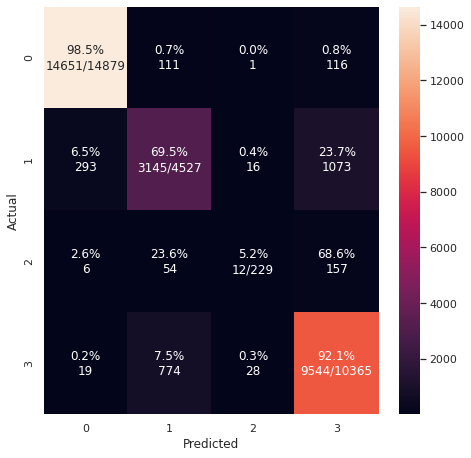

In [ ]:
# Confusion matrix for KNN
labels = ['0','1','2','3']
cm_analysis(Truevalue_cat_df,knn_predict_cat_df,labels,ymap=None)

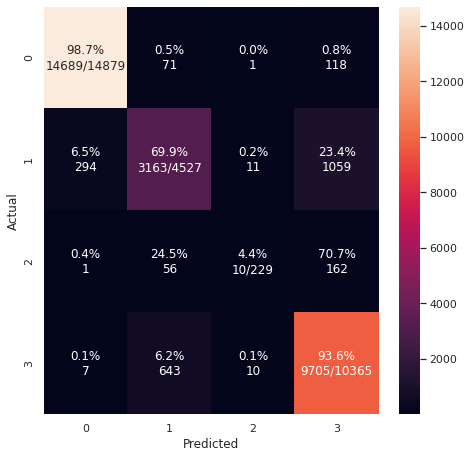

In [ ]:
# Confusion matrix for Random Forest
cm_analysis(Truevalue_cat_df,rf_predict_cat_df,labels,ymap=None)

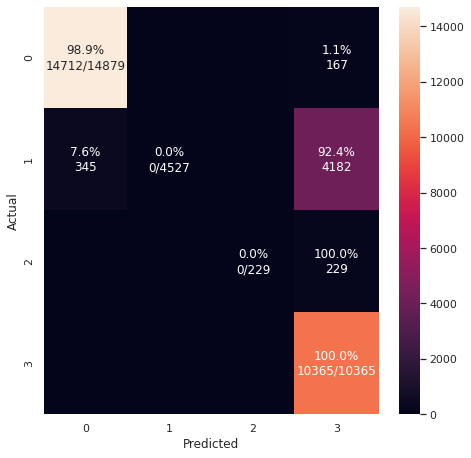

In [ ]:
# Confusion matrix for most frequent value
cm_analysis(Truevalue_cat_df,mof_predict_cat_df,labels,ymap=None)

# Part II Modelling 

In [ ]:
from sklearn.model_selection import cross_val_score

def model_evaluation(algo,algoname):
  algo.fit(x_train,y_train) 
  predictions = algo.predict_proba(x_train)[:,1]
  roc_score = roc_auc_score(y_train,predictions)
  cv_score_array = cross_val_score(algo,x_train,y_train,scoring = "roc_auc",cv = 5)
  cv_score = cv_score_array.mean()

  print(f"==============={algoname}================")
  print(f"roc score:{roc_score}")
  print(f"cv roc score{cv_score}")

  return cv_score



## Explore models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_score = model_evaluation(lr,"Logistic Regression")

===============Logistic Regression================
roc score:0.8690858598110465
cv roc score0.8690245211437209


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_score = model_evaluation(knn,"KNN")

===============KNN================
roc score:0.9306550196083294
cv roc score0.8233172617772917


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_score = model_evaluation(dt,"Decision Tree")

===============Decision Tree================
roc score:1.0
cv roc score0.7095808595938131


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes_score = model_evaluation(bayes,"Naive Bayes")

===============Naive Bayes================
roc score:0.8465699783764189
cv roc score0.8465452430115347


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_score = model_evaluation(rf, "Random Forest")

===============Random Forest================
roc score:0.999999998145427
cv roc score0.8835999976469215


### GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()
gbdt_score = model_evaluation(gbdt,"Gradient Boosting")

===============Gradient Boosting================
roc score:0.8818887412564893
cv roc score0.8806542349998387


### XGBOOST

In [ ]:
params = {'learning_rate' :0.1, 'n_estimators':100,'max_depth':6, 'min_child_weight':1,'seed':0,
          'subsample':0.8, 'colsample_bytree':0.8, 'gamma':0,'reg_alpha':0,'reg_lambda':1}

In [ ]:
xgb_cls = XGBClassifier(**params)
xgb_score = model_evaluation(xgb_cls, "XGBoost")

===============XGBoost================
roc score:0.8954450516870549
cv roc score0.887675089484137


## Hyperparameter tuning

We chose models from above with ROC_AUC greater than 0.88 for hyperparameter tuning. They are Ramdon Forest classifier, Gradient Boosting classifier and XGBoost classifier.

### Ramdon Forest

In [ ]:
#find the depth range for trees in the base classifier
#this can be an reference when tuning max_features

max_depth = 0
min_depth = rf.estimators_[0].tree_.max_depth
for tree in rf.estimators_:
  max_depth = max(max_depth, tree.tree_.max_depth)
  min_depth = min(min_depth, tree.tree_.max_depth)

print( "max_depth: ", max_depth)
print("min_depth: ", min_depth)

max_depth:  61
min_depth:  42


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth':[30, 45, None],
    'max_features': ['sqrt', 10]
  }

grid_search = GridSearchCV(rf, param_grid,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search.fit(x_train, y_train)

import pickle
#save model
pickle.dump(grid_search.best_estimator_, open('drive/MyDrive/rf_tuned.pkl', 'wb' ))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=30, max_features=sqrt, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=30, max_features=sqrt, n_estimators=100, score=0.885, total= 1.9min
[CV] max_depth=30, max_features=sqrt, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  max_depth=30, max_features=sqrt, n_estimators=100, score=0.884, total= 1.9min
[CV] max_depth=30, max_features=sqrt, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min remaining:    0.0s


[CV]  max_depth=30, max_features=sqrt, n_estimators=100, score=0.885, total= 1.9min
[CV] max_depth=30, max_features=sqrt, n_estimators=100 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=100, score=0.882, total= 1.9min
[CV] max_depth=30, max_features=sqrt, n_estimators=100 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=100, score=0.883, total= 1.9min
[CV] max_depth=30, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, score=0.886, total= 3.7min
[CV] max_depth=30, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, score=0.886, total= 3.8min
[CV] max_depth=30, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, score=0.887, total= 3.7min
[CV] max_depth=30, max_features=sqrt, n_estimators=200 ...............
[CV]  max_depth=30, max_features=sqrt, n_estimators=200, score=0.883, 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 493.0min finished


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
grid_search.best_score_

0.886100346260907

### GBDT

In [ ]:
from sklearn.model_selection import GridSearchCV

#tune 'max_depth' and 'max_features' first

param_grid = {
    'max_depth':[3, 5, 7],
    'max_features': [None,'sqrt'],
  }

grid_search = GridSearchCV(gbdt, param_grid,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search.fit(x_train, y_train)

grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=3, max_features=None ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=3, max_features=None, score=0.883, total= 3.3min
[CV] max_depth=3, max_features=None ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV] ...... max_depth=3, max_features=None, score=0.881, total= 3.3min
[CV] max_depth=3, max_features=None ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.6min remaining:    0.0s


[CV] ...... max_depth=3, max_features=None, score=0.881, total= 3.3min
[CV] max_depth=3, max_features=None ..................................
[CV] ...... max_depth=3, max_features=None, score=0.879, total= 3.3min
[CV] max_depth=3, max_features=None ..................................
[CV] ...... max_depth=3, max_features=None, score=0.880, total= 3.3min
[CV] max_depth=3, max_features=sqrt ..................................
[CV] ...... max_depth=3, max_features=sqrt, score=0.882, total=  37.9s
[CV] max_depth=3, max_features=sqrt ..................................
[CV] ...... max_depth=3, max_features=sqrt, score=0.880, total=  38.5s
[CV] max_depth=3, max_features=sqrt ..................................
[CV] ...... max_depth=3, max_features=sqrt, score=0.879, total=  38.1s
[CV] max_depth=3, max_features=sqrt ..................................
[CV] ...... max_depth=3, max_features=sqrt, score=0.877, total=  38.4s
[CV] max_depth=3, max_features=sqrt ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 95.6min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
grid_search.best_score_

0.8891556786460745

In [ ]:
#tune 'max_depth' on previous best estimator

param_grid2 = {
    'max_depth': [7,9,11]
  }

grid_search2 = GridSearchCV(grid_search.best_estimator_, param_grid2,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search2.fit(x_train, y_train)

grid_search2.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] max_depth=7 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=7, score=0.891, total= 7.3min
[CV] max_depth=7 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s


[CV] ......................... max_depth=7, score=0.890, total= 7.3min
[CV] max_depth=7 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.6min remaining:    0.0s


[CV] ......................... max_depth=7, score=0.890, total= 7.3min
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.887, total= 7.3min
[CV] max_depth=7 .....................................................
[CV] ......................... max_depth=7, score=0.888, total= 7.3min
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.890, total= 9.1min
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.890, total= 9.2min
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.891, total= 9.1min
[CV] max_depth=9 .....................................................
[CV] ......................... max_depth=9, score=0.887, total= 9.3min
[CV] max_depth=9 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 138.6min finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
grid_search2.best_score_

0.8892283007726774

In [ ]:
import pickle
#save model
pickle.dump(grid_search2.best_estimator_, open('drive/MyDrive/gbdt_tuned.pkl', 'wb' ))

In [ ]:
#tune 'subsample' on previous best estimator

param_grid3 = {
    'subsample': [0.7,0.8,0.9,1]
  }

grid_search3 = GridSearchCV(grid_search2.best_estimator_, param_grid3,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search3.fit(x_train, y_train)

grid_search3.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] subsample=0.7 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... subsample=0.7, score=0.889, total= 6.8min
[CV] subsample=0.7 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s


[CV] ....................... subsample=0.7, score=0.889, total= 6.7min
[CV] subsample=0.7 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.5min remaining:    0.0s


[CV] ....................... subsample=0.7, score=0.889, total= 6.7min
[CV] subsample=0.7 ...................................................
[CV] ....................... subsample=0.7, score=0.886, total= 6.7min
[CV] subsample=0.7 ...................................................
[CV] ....................... subsample=0.7, score=0.888, total= 6.7min
[CV] subsample=0.8 ...................................................
[CV] ....................... subsample=0.8, score=0.889, total= 7.7min
[CV] subsample=0.8 ...................................................
[CV] ....................... subsample=0.8, score=0.890, total= 7.8min
[CV] subsample=0.8 ...................................................
[CV] ....................... subsample=0.8, score=0.891, total= 7.7min
[CV] subsample=0.8 ...................................................
[CV] ....................... subsample=0.8, score=0.887, total= 7.7min
[CV] subsample=0.8 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 163.0min finished


In [ ]:
grid_search3.best_score_

0.8892277230535697

In [ ]:
grid_search3.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#grid_search3.best_estimator_ was not saved when connection closed
#instantiate a new one with the same hyperparameters

from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(max_depth=9, max_features=None, subsample=1)

gbdt

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
import pickle

#tune 'n_estimators' and 'learning rate'

param_grid4 = {
    'n_estimators': [100,300],
    'learning_rate':[0.05,0.1,0.15]
  }

grid_search4 = GridSearchCV(gbdt, param_grid4,
                           scoring='roc_auc',
                           cv = 5,
                           verbose=3)

grid_search4.fit(x_train, y_train)

#save model
pickle.dump(grid_search4.best_estimator_, open('drive/MyDrive/gbdt_tuned2.pkl', 'wb' ))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, n_estimators=100, score=0.890, total= 8.8min
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.8min remaining:    0.0s


[CV]  learning_rate=0.05, n_estimators=100, score=0.889, total= 8.8min
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.6min remaining:    0.0s


[CV]  learning_rate=0.05, n_estimators=100, score=0.889, total= 8.6min
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV]  learning_rate=0.05, n_estimators=100, score=0.886, total= 8.7min
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV]  learning_rate=0.05, n_estimators=100, score=0.887, total= 8.6min
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV]  learning_rate=0.05, n_estimators=300, score=0.892, total=27.2min
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV]  learning_rate=0.05, n_estimators=300, score=0.891, total=27.5min
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV]  learning_rate=0.05, n_estimators=300, score=0.892, total=27.6min
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV]  learning_rate=0.05, n_estimators=300, score=0.889, total=27.3min
[CV] learning_rate=0.05, n_estimators=300 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 559.0min finished


In [ ]:
grid_search4.best_score_

0.8907469573981283

In [ ]:
grid_search4.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#tuning 'n_estimators' and 'learning rate' has made significant progress
#try another set of values

param_grid5 = [
    {'n_estimators': [500],'learning_rate':[0.01, 0.05]},
    {'n_estimators': [300],'learning_rate':[0.01]},
]

grid_search5 = GridSearchCV(grid_search4.best_estimator_, param_grid5,
                           scoring='roc_auc',
                           cv = 5,
                           verbose=3)

grid_search5.fit(x_train, y_train)

#save model
pickle.dump(grid_search5.best_estimator_, open('drive/MyDrive/gbdt_tuned3.pkl', 'wb' ))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=500, score=0.890, total=45.9min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 45.9min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=0.889, total=45.0min
[CV] learning_rate=0.01, n_estimators=500 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 91.0min remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=500, score=0.890, total=44.7min
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV]  learning_rate=0.01, n_estimators=500, score=0.887, total=44.5min
[CV] learning_rate=0.01, n_estimators=500 ............................
[CV]  learning_rate=0.01, n_estimators=500, score=0.887, total=45.1min
[CV] learning_rate=0.05, n_estimators=500 ............................
[CV]  learning_rate=0.05, n_estimators=500, score=0.892, total=47.2min
[CV] learning_rate=0.05, n_estimators=500 ............................
[CV]  learning_rate=0.05, n_estimators=500, score=0.892, total=47.1min
[CV] learning_rate=0.05, n_estimators=500 ............................
[CV]  learning_rate=0.05, n_estimators=500, score=0.892, total=47.0min
[CV] learning_rate=0.05, n_estimators=500 ............................
[CV]  learning_rate=0.05, n_estimators=500, score=0.889, total=47.0min
[CV] learning_rate=0.05, n_estimators=500 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 592.6min finished


In [ ]:
grid_search5.best_score_

0.8908628341020739

In [ ]:
grid_search5.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### XGBoosting

In [ ]:
#try an intuitive hyperparameter setting

params = {'learning_rate' :0.1, 'n_estimators':100,'max_depth':6, 'min_child_weight':1,'seed':0,
          'subsample':0.8, 'colsample_bytree':0.8, 'gamma':0,'reg_alpha':0,'reg_lambda':1}

In [ ]:
xgb_cls = XGBClassifier(**params)
xgb_score = model_evaluation(xgb_cls, "XGBoost")

===============XGBoost================
roc score:0.8967989995995422
cv roc score0.8885410597547796


In [ ]:
xgb_cls

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

#Firstly, tune the number of trees and learning rate

param_grid = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.05,0.1,0.15]
}

grid_search = GridSearchCV(xgb_cls, param_grid,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search.fit(x_train, y_train)

#save model
pickle.dump(grid_search.best_estimator_, open('drive/MyDrive/xgboost_tuned.pkl', 'wb' ))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.05, n_estimators=100, score=0.886, total= 1.2min
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  learning_rate=0.05, n_estimators=100, score=0.885, total= 1.2min
[CV] learning_rate=0.05, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  learning_rate=0.05, n_estimators=100, score=0.886, total= 1.2min
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV]  learning_rate=0.05, n_estimators=100, score=0.882, total= 1.2min
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV]  learning_rate=0.05, n_estimators=100, score=0.883, total= 1.2min
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV]  learning_rate=0.05, n_estimators=200, score=0.890, total= 2.3min
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV]  learning_rate=0.05, n_estimators=200, score=0.889, total= 2.3min
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV]  learning_rate=0.05, n_estimators=200, score=0.890, total= 2.3min
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV]  learning_rate=0.05, n_estimators=200, score=0.887, total= 2.3min
[CV] learning_rate=0.05, n_estimators=200 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 101.3min finished


In [ ]:
grid_search.best_score_

0.891508993126535

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

#Then, tune the hyperparameters restraining the overfitting

param_grid2 = {
    'max_depth' : [6,8,10],
    'min_child_weight' : [2,2.5,3],
    'gamma':[0,0.3,0.5],
}

grid_search2 = GridSearchCV(grid_search.best_estimator_, param_grid2,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search2.fit(x_train, y_train)

#save model
pickle.dump(grid_search2.best_estimator_, open('drive/MyDrive/xgboost_tuned2.pkl', 'wb' ))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] gamma=0, max_depth=6, min_child_weight=2 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0, max_depth=6, min_child_weight=2, score=0.892, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV]  gamma=0, max_depth=6, min_child_weight=2, score=0.892, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.6min remaining:    0.0s


[CV]  gamma=0, max_depth=6, min_child_weight=2, score=0.892, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2 ........................
[CV]  gamma=0, max_depth=6, min_child_weight=2, score=0.889, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2 ........................
[CV]  gamma=0, max_depth=6, min_child_weight=2, score=0.891, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2.5 ......................
[CV]  gamma=0, max_depth=6, min_child_weight=2.5, score=0.893, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2.5 ......................
[CV]  gamma=0, max_depth=6, min_child_weight=2.5, score=0.892, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2.5 ......................
[CV]  gamma=0, max_depth=6, min_child_weight=2.5, score=0.892, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weight=2.5 ......................
[CV]  gamma=0, max_depth=6, min_child_weight=2.5, score=0.889, total= 3.3min
[CV] gamma=0, max_depth=6, min_child_weig

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 621.9min finished


In [ ]:
grid_search2.best_score_

0.8916514714154484

In [ ]:
grid_search2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

#Finally, tune the subsamples of sample used and features used

param_grid3 = {
    'subsample' : [1,0.9,0.8,0.7],
    'colsample_bytree':[1,0.9,0.8,0.7],
}

grid_search3 = GridSearchCV(grid_search2.best_estimator_, param_grid3,
                           scoring='roc_auc',
                           cv = 5,
                           verbose = 3)

grid_search3.fit(x_train, y_train)

#save model
pickle.dump(grid_search3.best_estimator_, open('drive/MyDrive/xgboost_tuned3.pkl', 'wb' ))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] colsample_bytree=1, subsample=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... colsample_bytree=1, subsample=1, score=0.892, total= 3.8min
[CV] colsample_bytree=1, subsample=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s


[CV] ..... colsample_bytree=1, subsample=1, score=0.892, total= 3.8min
[CV] colsample_bytree=1, subsample=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.6min remaining:    0.0s


[CV] ..... colsample_bytree=1, subsample=1, score=0.892, total= 3.8min
[CV] colsample_bytree=1, subsample=1 .................................
[CV] ..... colsample_bytree=1, subsample=1, score=0.889, total= 3.8min
[CV] colsample_bytree=1, subsample=1 .................................
[CV] ..... colsample_bytree=1, subsample=1, score=0.891, total= 3.8min
[CV] colsample_bytree=1, subsample=0.9 ...............................
[CV] ... colsample_bytree=1, subsample=0.9, score=0.892, total= 3.9min
[CV] colsample_bytree=1, subsample=0.9 ...............................
[CV] ... colsample_bytree=1, subsample=0.9, score=0.892, total= 3.9min
[CV] colsample_bytree=1, subsample=0.9 ...............................
[CV] ... colsample_bytree=1, subsample=0.9, score=0.892, total= 3.9min
[CV] colsample_bytree=1, subsample=0.9 ...............................
[CV] ... colsample_bytree=1, subsample=0.9, score=0.889, total= 3.8min
[CV] colsample_bytree=1, subsample=0.9 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 277.0min finished


In [ ]:
grid_search3.best_score_

0.8916514714154484

In [ ]:
grid_search3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.8, verbosity=1)

## Covariate importance

We consider features with importance greater than average (i.e. 1/30) as important features; features with importance less than 1/3 average (i.e. 1/3 * 1/30) as trivial features. 

In [22]:
#function that links each fueatue with it importance
#and sorts the features
def sort_imp(feature_importance):
  imp_dict = {}
  for i in range(len(feature_importance)):
    imp_dict[x_train.columns[i]] = feature_importance[i]

  sorted_imp = sorted(imp_dict.items(), key=lambda x: x[1])

  covariates = []
  importance = []
  for i in range(len(sorted_imp)):
    covariates.append(sorted_imp[i][0])
    importance.append(sorted_imp[i][1])
  return [covariates, importance, sorted_imp]

#function that find the important features
def find_important(sorted_imp):
  imp_features = []
  for feature in sorted_imp:
    if feature[1] > 1/30:
      imp_features.append(feature)
  return imp_features

#function that find the trivial features
def find_trivial(sorted_imp):
  triv_features = []
  for feature in sorted_imp:
    if feature[1] < (1/3) * (1/30):
      triv_features.append(feature)
  return triv_features


### Random Forest

In [13]:
rf = pickle.load(open('drive/MyDrive/rf_tuned.pkl','rb'))
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf.feature_importances_

array([0.01558035, 0.02335135, 0.02867914, 0.00972736, 0.01907478,
       0.00561842, 0.01163733, 0.02417822, 0.02147272, 0.0095317 ,
       0.0227523 , 0.01687004, 0.0032583 , 0.00400913, 0.02748014,
       0.07389135, 0.12064421, 0.01600817, 0.04803785, 0.03988398,
       0.04678172, 0.04631144, 0.04317171, 0.04331784, 0.05987373,
       0.05372508, 0.04000851, 0.04410956, 0.04048334, 0.04053021])

In [23]:
[covariates, importance, sorted_imp] = sort_imp(rf.feature_importances_)

<BarContainer object of 30 artists>

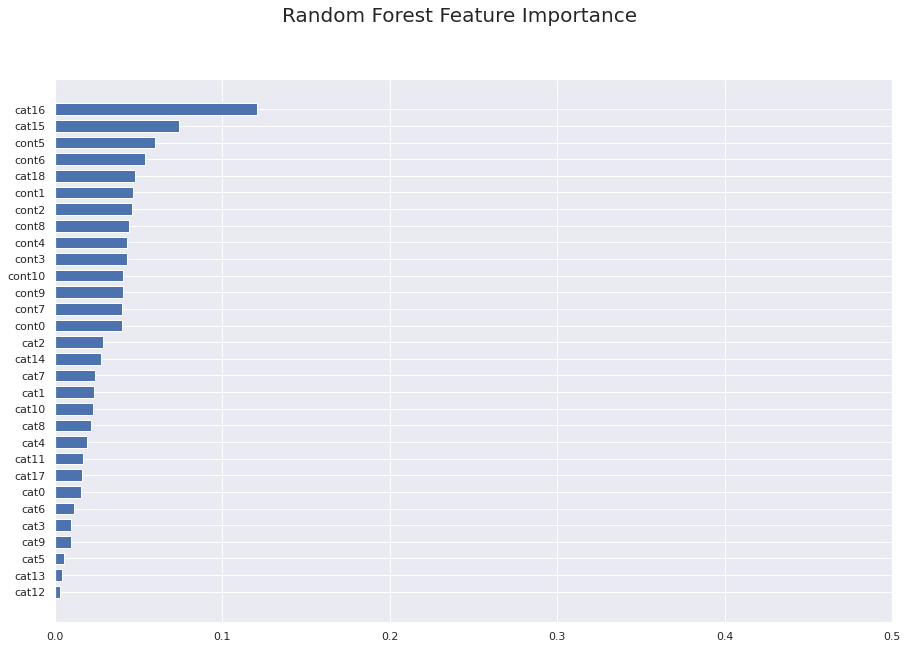

In [19]:
plt.figure(figsize=(15,10))
plt.xlim(0,0.5)
plt.suptitle('Random Forest Feature Importance', fontsize = 20)
plt.barh(covariates, importance, height=0.7)

In [24]:
#print the important feagures (importance > 1/30) for the Random Forest classifier
find_important(sorted_imp)

[('cont0', 0.03988398164811102),
 ('cont7', 0.04000850995490982),
 ('cont9', 0.04048333866081773),
 ('cont10', 0.04053021182656763),
 ('cont3', 0.0431717087846098),
 ('cont4', 0.04331784339336596),
 ('cont8', 0.044109559425859764),
 ('cont2', 0.04631144318085928),
 ('cont1', 0.04678172339644136),
 ('cat18', 0.04803784637448611),
 ('cont6', 0.053725078752877055),
 ('cont5', 0.0598737252873753),
 ('cat15', 0.07389134896171698),
 ('cat16', 0.12064420987775613)]

In [25]:
#print the trivial feagures (importance < 1/3 * 1/30) for the Random Forest classifier
find_trivial(sorted_imp)

[('cat12', 0.003258301969498215),
 ('cat13', 0.004009130457126398),
 ('cat5', 0.00561842231132919),
 ('cat9', 0.009531697790798042),
 ('cat3', 0.009727356483332074)]

### Gradient Boosting 

In [27]:
gb = pickle.load(open('drive/MyDrive/gbdt_tuned3.pkl','rb'))
gb

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<BarContainer object of 30 artists>

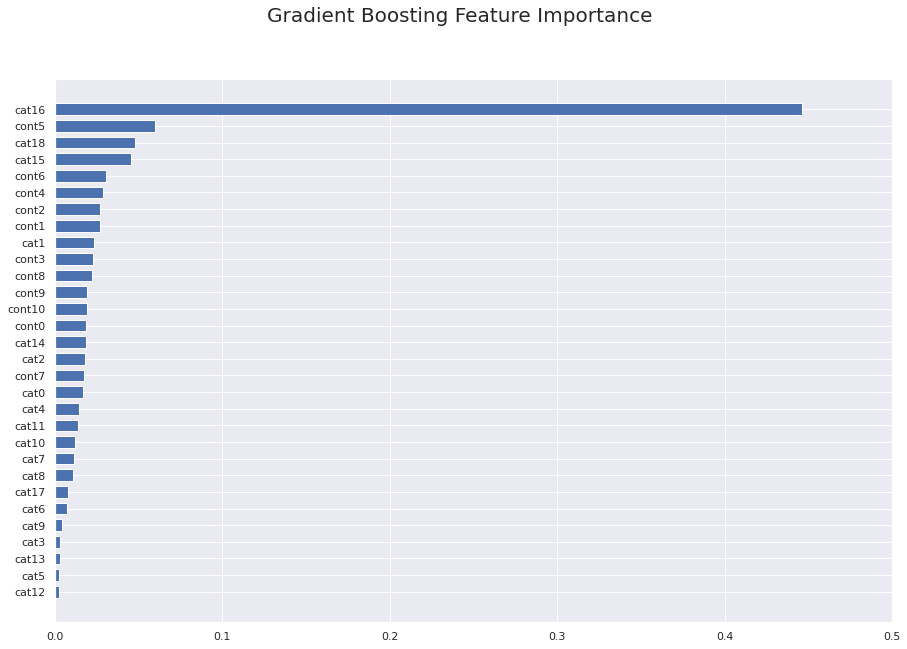

In [28]:
[covariates, importance, sorted_imp] = sort_imp(gb.feature_importances_)
plt.figure(figsize=(15,10))
plt.xlim(0,0.5)
plt.suptitle('Gradient Boosting Feature Importance', fontsize = 20)
plt.barh(covariates, importance, height=0.7)

In [29]:
#print the important feagures (importance > 1/30) for the Gradient Boosting classifier
find_important(sorted_imp)

[('cat15', 0.045464133870031974),
 ('cat18', 0.047853785514249826),
 ('cont5', 0.059618601457983714),
 ('cat16', 0.4465190447160135)]

In [30]:
#print the trivial feagures (importance < 1/3 * 1/30) for the Gradient Boosting classifier
find_trivial(sorted_imp)

[('cat12', 0.0025945058063713785),
 ('cat5', 0.0026624624164281047),
 ('cat13', 0.002905286976033287),
 ('cat3', 0.0029371157366046437),
 ('cat9', 0.004418541100497629),
 ('cat6', 0.006922817663696198),
 ('cat17', 0.007855236448861717),
 ('cat8', 0.010803817407717983)]

### XGBoosting

In [31]:
xgb = pickle.load(open('drive/MyDrive/xgboost_tuned3.pkl','rb'))
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=0.8, verbosity=1)

In [32]:
xgb.importance_type

'gain'

<BarContainer object of 30 artists>

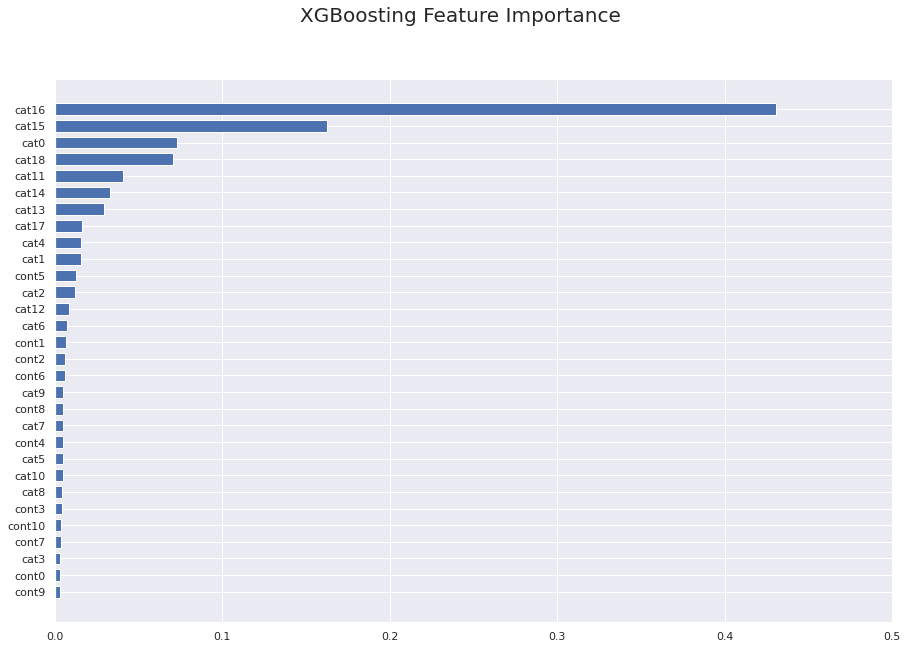

In [33]:
[covariates, importance, sorted_imp] = sort_imp(xgb.feature_importances_)
plt.figure(figsize=(15,10))
plt.xlim(0,0.5)
plt.suptitle('XGBoosting Feature Importance', fontsize = 20)
plt.barh(covariates, importance, height=0.7)

In [34]:
#print the important feagures (importance > 1/30) for the XGBoost classifier
find_important(sorted_imp)

[('cat11', 0.040473092),
 ('cat18', 0.070226416),
 ('cat0', 0.07307679),
 ('cat15', 0.1624435),
 ('cat16', 0.43060663)]

In [35]:
#print the trivial feagures (importance < 1/3 * 1/30) for the XGBoost classifier
find_trivial(sorted_imp)

[('cont9', 0.0032306558),
 ('cont0', 0.0032477677),
 ('cat3', 0.003285788),
 ('cont7', 0.0034548745),
 ('cont10', 0.0036067006),
 ('cont3', 0.004433656),
 ('cat8', 0.0044996133),
 ('cat10', 0.004550428),
 ('cat5', 0.0046989853),
 ('cont4', 0.0048213955),
 ('cat7', 0.004842769),
 ('cont8', 0.0049055987),
 ('cat9', 0.0049927426),
 ('cont6', 0.006130985),
 ('cont2', 0.0062511424),
 ('cont1', 0.006510035),
 ('cat6', 0.0070916573),
 ('cat12', 0.008627758)]

## Test the final model

In [ ]:
xgb = pickle.load(open('drive/MyDrive/xgboost_tuned3.pkl','rb'))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
y_probas_xgb = cross_val_predict(xgb,x_train, y_train,cv = 5,method = "predict_proba")

### ROC-AUC curve

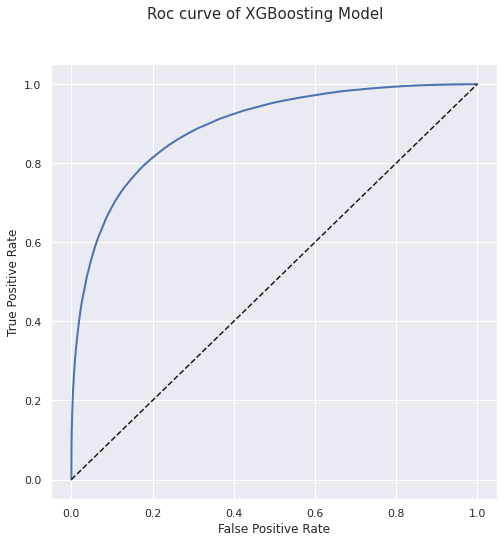

In [ ]:
fpr,tpr,thresholds = roc_curve(y_train,y_probas_xgb[:,1])

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,linewidth = 2)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

plt.figure(figsize=(8,8))
plot_roc_curve(fpr,tpr)
plt.suptitle("Roc curve of XGBoosting Model ", fontsize = 15)
plt.show()


### Confusion matrix 

In [ ]:
pred = xgb.predict(x_train)

In [ ]:
cm= confusion_matrix(y_train, pred)

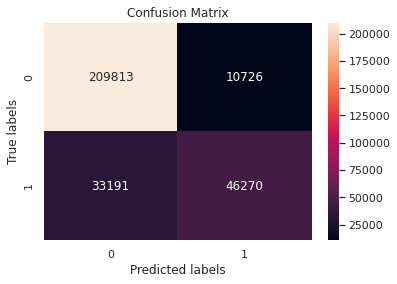

In [ ]:
cm = confusion_matrix(y_train, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### Performance Measures

In [ ]:
pd.DataFrame({"Measurements":["Accuracy", "Precision","Recall","AUC"],
              "Value":[accuracy_score(y_train,pred),precision_score(y_train,pred),recall_score(y_train,pred),roc_auc_score(y_train, y_probas_xgb[:,1])]})

,Measurements,Value
0,Accuracy,0.853610
1,Precision,0.811811
2,Recall,0.582298
3,AUC,0.890744


#Submit to Kaggle

In [ ]:
test_prediction = xgb.predict_proba(x_test)[:,1]
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission['target'] = test_prediction
submission.to_csv('/content/drive/MyDrive/final.csv',index=False)